# **The future of ML (Americans vs Indians)**
Since I started Kaggle competitions, I have a question. I called it beginner's curiosity.   

**"Have you ever thought about which countries have the biggest impact on Kaggle competition?"**  

As everybody knows, USA is an obvious IT powerhouse along with Silicon Valley. It has the largest number of Kaggle Grandmaster Champions. There is no doubt that the USA has the most influence on Kaggle competitions.  

You can also see a lot of Indians on the list of participants. India, known as the rising IT powerhouse, is interested in the Kaggle competitions. It can be confirmed easily by checking a percentage of respondents to the 《2020 Kaggle Machine Learning & data Science Survey》. The response rate for Indians is the highest about 29.2%(5,850 people). It is higher than the second-ranked country, which I would explain. 

In addition, a few years ago, every country emphasized the importance of machine learning because It can be used in lots of fields in the world. I also wondered about the future of machine learning, so I decided to look into the future of Machine Learning through responses from two leader countries. Actually, if we look at the current trend of machine learning, we can easily discover it.  

**"Do you know the future of Machine Learning?"**  

To sum up, I will compare the responses of American and Indian especially about Machine Learning in the order below.  


## Table of Contents
[1. Responses Rate by Country](#chapter1)  
[2. Percentage by age & gender](#chapter2)  
[3. Education & Job](#chapter3)  
[4. Development Environment](#chapter4)  
[5. Basic of Machine Learning](#chapter5)  
[6. CV & NLP](#chapter6)  
[7. Machine Learning in the business](#chapter7)  
[8. Want to learn machine learning product](#chapter8)  

## Library & Data Import

In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
plt.rcParams['figure.dpi'] = 200
plt.rcParams['lines.linewidth'] = 2
import matplotlib as mpl
from matplotlib import style
style.use('fivethirtyeight')
import plotly.express as px
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
pd.set_option('mode.chained_assignment', None)
survey = pd.read_csv('../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')
question = survey.iloc[0,:].T
full_df = survey.iloc[1:,:]

full_df[full_df.columns[3]].replace({'United States of America':'USA',
                                         'United Kingdom of Great Britain and Northern Ireland':'UK'}, inplace=True)

df = full_df[(full_df['Q3']=='India')|(full_df['Q3']=='USA')]
df = df.iloc[1:,:]
df.reset_index(drop=True, inplace=True)

df = df[(df['Q2']=='Man')|(df['Q2']=='Woman')]
df = df.iloc[1:,:]
df.reset_index(drop=True, inplace=True)

FileNotFoundError: [Errno 2] File ../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv does not exist: '../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv'

In [ ]:
# Extract data by country
India = df[df['Q3']=='India']
India = India.iloc[1:,:]
India.reset_index(drop=True, inplace=True)

USA = df[df['Q3']=='USA']
USA = USA.iloc[1:,:]
USA.reset_index(drop=True, inplace=True)

In [ ]:
question.head()

In [7]:
full_df.head()

Time from Start to Finish (seconds)     Q1   Q2         Q3  \
1                                1838  35-39  Man   Colombia   
2                              289287  30-34  Man        USA   
3                                 860  35-39  Man  Argentina   
4                                 507  30-34  Man        USA   
5                                  78  30-34  Man      Japan   

                  Q4                 Q5           Q6 Q7_Part_1 Q7_Part_2  \
1    Doctoral degree            Student   5-10 years    Python         R   
2    Master’s degree      Data Engineer   5-10 years    Python         R   
3  Bachelor’s degree  Software Engineer  10-20 years       NaN       NaN   
4    Master’s degree     Data Scientist   5-10 years    Python       NaN   
5    Master’s degree  Software Engineer    3-5 years    Python       NaN   

  Q7_Part_3  ... Q35_B_Part_2 Q35_B_Part_3 Q35_B_Part_4   Q35_B_Part_5  \
1       SQL  ...          NaN          NaN          NaN   TensorBoard    
2       SQL  ...          NaN          NaN          NaN            NaN   
3       NaN  ...          NaN          NaN          NaN            NaN   
4       SQL  ...          NaN          NaN          NaN            NaN   
5       NaN  ...          NaN          NaN          NaN            NaN   

  Q35_B_Part_6 Q35_B_Part_7 Q35_B_Part_8 Q35_B_Part_9 Q35_B_Part_10  \
1          NaN          NaN          NaN          NaN           NaN   
2          NaN          NaN          NaN          NaN           NaN   
3          NaN          NaN          NaN          NaN          None   
4          NaN          NaN          NaN          NaN           NaN   
5          NaN          NaN          NaN          NaN           NaN   

  Q35_B_OTHER  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
5         NaN  

[5 rows x 355 columns]

## 1. Responses Rate by Country <a class="anchor" id="chapter1"></a>

In [8]:
full_pie = px.pie(full_df, full_df.columns[3],
                 title='Survey Responses Rate by Country',
                 template='seaborn', hole=0.5)
full_pie.update_traces(textposition='inside', textinfo='percent+label')
full_pie.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
full_pie.show()

The response rate for Indians is the highest which is about 29.2% or 5,850 people. It is about 2.6 times higher than USA, a second-ranked country. Based on the response of the Americans and Indians for this report, I extracted the data by 2 using the two countries.

## Preprocessing

To organize the data neatly, I pre-processed a gender column in which only females and males would remain. (146 responses will be deleted)

In [9]:
df = df[(df[df.columns[2]]=='Man')|(df[df.columns[2]]=='Woman')]
df = df.iloc[1:,:]
df.reset_index(drop=True, inplace=True)
df.shape

(7940, 355)

In [10]:
print("- Valid American Response: ",len(df[df['Q3']=='USA']))
print("- Valid Indian Response: ",len(df[df['Q3']=='India']))

- Valid American Response:  2161
- Valid Indian Response:  5779


I also made each data set('USA', 'India') to make pie graphs.

## 2. Percentage by age & gender <a class="anchor" id="chapter2"></a>

To see their interest in coding, let's look at the age and gender data.

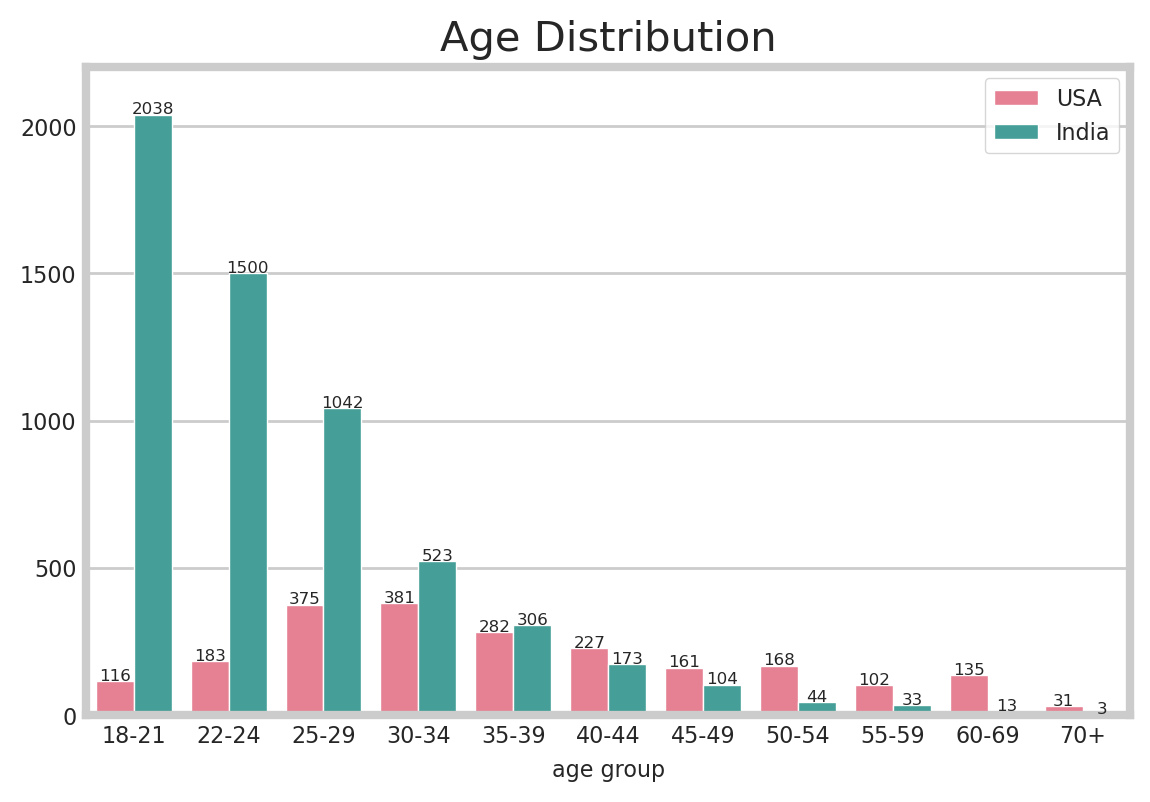

In [11]:
legend_list = ['USA', 'India']

def countplot_(data, col_name, q_order):
  values = data[col_name].value_counts()[q_order].values
  ax = sns.countplot(x = col_name, hue=data.columns[3], data=data, hue_order = legend_list, palette = "husl",
                    order = ['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69','70+'])
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height+3, height, ha='center', size=6)
  ax.set_ylim([0, 2200])
  plt.xticks(rotation=0, fontsize=8)
  plt.xlabel('age group', fontsize=8)
  plt.yticks(fontsize=8)
  plt.ylabel('')
  plt.legend(fontsize=8, loc='upper right')
  plt.title('Age Distribution', fontsize=15)
  plt.show()
q1_order = ['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69','70+']
col_name = "Q1"
countplot_(df, col_name, q1_order)

You can easily notice in USA the distribution of age groups is more regular than India. It represents the cording fever especially among young Indians. It can be interpreted that India has a craze for coding.

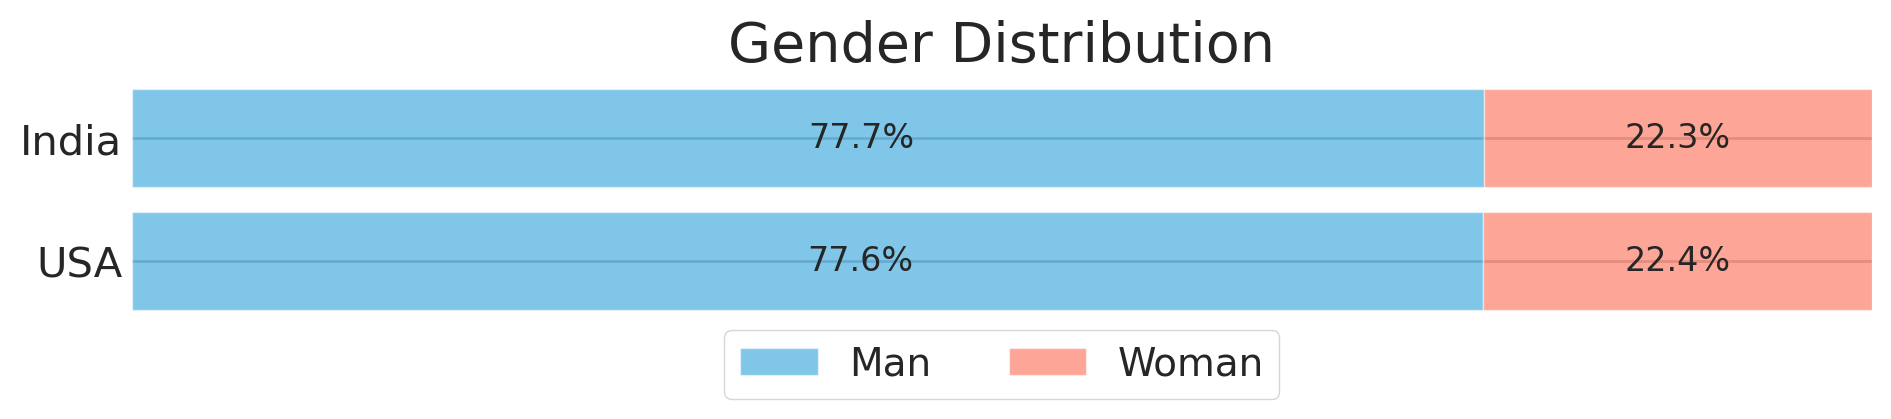

In [12]:
q3_order = df['Q3'].value_counts()[:11].index
df_q2q3 = df[['Q2','Q3']].groupby('Q3')['Q2'].value_counts().unstack().loc[q3_order]
df_q2q3['sum'] = df_q2q3.sum(axis=1)
df_q2q3_ratio = (df_q2q3.T / df_q2q3['sum']).T[['Man','Woman']][::-1]

fig, ax = plt.subplots(1,1,figsize=(10, 1.5))

ax.barh(df_q2q3_ratio.index, df_q2q3_ratio['Man'], alpha=0.5, label='Man')
ax.barh(df_q2q3_ratio.index, df_q2q3_ratio['Woman'],
        left=df_q2q3_ratio['Man'], alpha=0.5, label='Woman')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(df_q2q3_ratio.index, fontsize=15)

# male percentage
for i in df_q2q3_ratio.index:
    ax.annotate(f"{df_q2q3_ratio['Man'][i]*100:.3}%", 
                   xy=(df_q2q3_ratio['Man'][i]/2, i), fontsize=12, va='center')

for i in df_q2q3_ratio.index:
    ax.annotate(f"{df_q2q3_ratio['Woman'][i]*100:.3}%", 
                   xy=(df_q2q3_ratio['Man'][i]+df_q2q3_ratio['Woman'][i]/2, i),
                   va='center', ha='center', fontsize=12)
    
plt.title('Gender Distribution', fontsize=20)   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.40))
plt.show()

The gender ratio of two countries is alike. In both countries, male respondents are about 3.4 times more than female respondents.

## 3. Education & Job <a class="anchor" id="chapter3"></a>
Then I checked their education level and their current job.

### 3-1. Level of Education
Please notice that I can just confirm their degree level, not major. However, many respondents study above bachelor's degree, so I think it is okay to assume that their major is related to coding or programming.

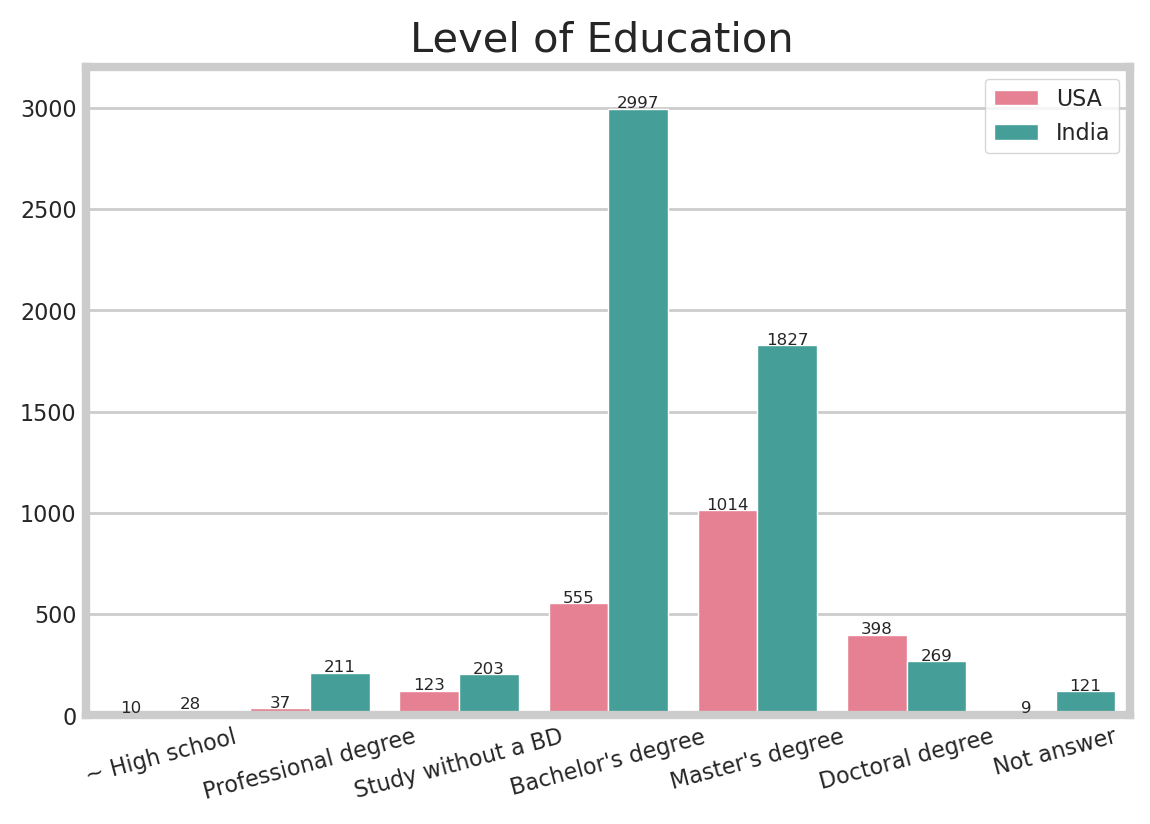

In [13]:
df['Q4'] = df['Q4'].str.replace("[^A-Za-z0-9-\s]+", "")
df['Q4'].replace({'No formal education past high school':'~ High school',
                   'I prefer not to answer':'Not answer',
                   'Some collegeuniversity study without earning a bachelors degree':'Study without a BD',
                   'Masters degree':"Master's degree",
                   'Bachelors degree':"Bachelor's degree",
                   ' High school':'~ High school'}, inplace=True)

def countplot_(data, col_name, q_order):
  values = data[col_name].value_counts()[q_order].values
  ax = sns.countplot(x = col_name, hue=data.columns[3], data=data, hue_order = legend_list, palette = "husl",
                    order = ['~ High school', 'Professional degree', 'Study without a BD', "Bachelor's degree","Master's degree",'Doctoral degree', 'Not answer'])
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height+3, height, ha='center', size=6)
  ax.set_ylim([0, 3200])
  plt.xticks(rotation=15, fontsize=8)
  plt.xlabel('')
  plt.yticks(fontsize=8)
  plt.ylabel('')
  plt.legend(fontsize=8, loc='upper right')
  plt.title('Level of Education ', fontsize=15)
  plt.show()
q4_order = ['~ High school', 'Professional degree', 'Study without a BD', "Bachelor's degree","Master's degree",'Doctoral degree', 'Not answer']
col_name = "Q4"
countplot_(df, col_name, q4_order)

In [14]:
df_normalize4 = df.groupby(['Q3'])['Q4'].value_counts(dropna=False, normalize=True, ascending=False)
df_normalize4 = pd.DataFrame(df_normalize4)
df_normalize4

Q4
Q3    Q4                           
India Bachelor's degree    0.518602
      Master's degree      0.316145
      Doctoral degree      0.046548
      Professional degree  0.036512
      Study without a BD   0.035127
      NaN                  0.021284
      Not answer           0.020938
      ~ High school        0.004845
USA   Master's degree      0.469227
      Bachelor's degree    0.256826
      Doctoral degree      0.184174
      Study without a BD   0.056918
      Professional degree  0.017122
      NaN                  0.006941
      ~ High school        0.004627
      Not answer           0.004165

In the case of master and doctor, the percentage of Americans(46.9%, 18.4%) is higher than Indians (31.6%, 4.7%). Many Indians obtained their bachelor’s degree(51.9%) and I also noticed that 3.7% of the Indians had a professional degree.  

It shows that USA already has many IT technicians that are highly educated, and India's level of coding education is growing.

### 3-2. Current Job

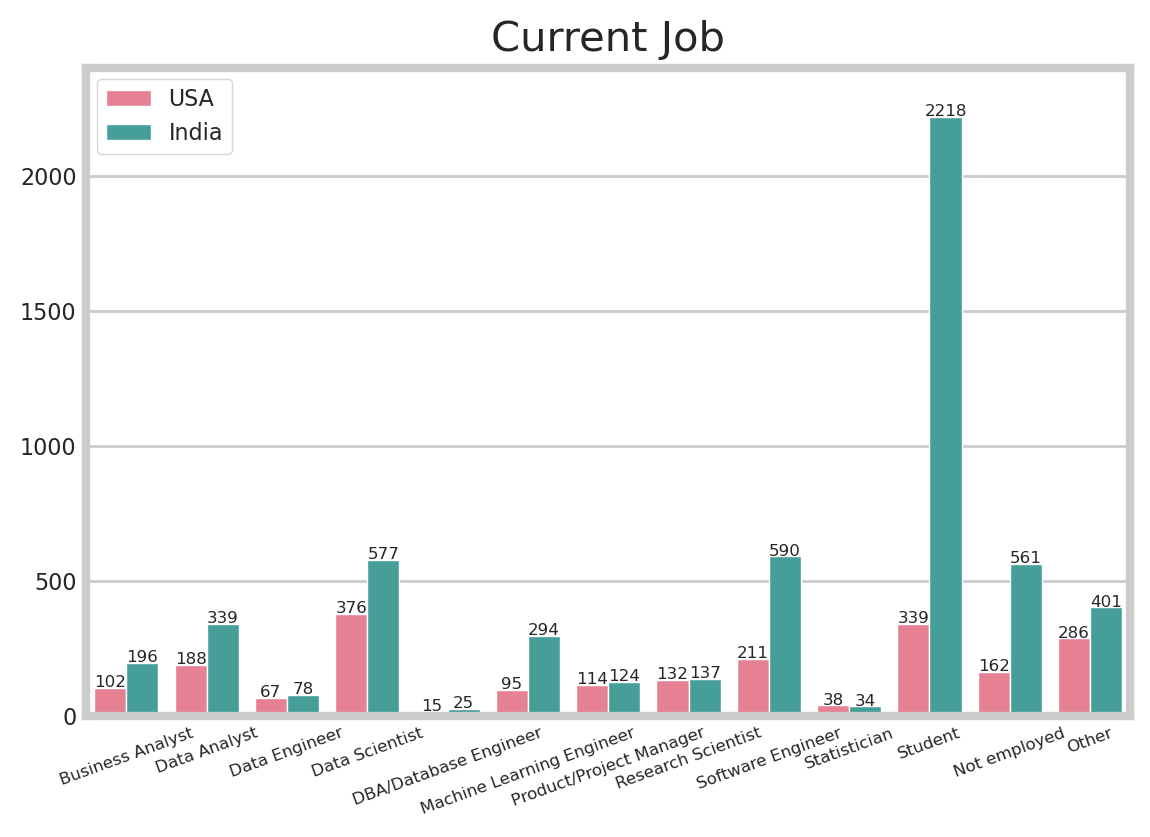

In [15]:
df['Q5'].replace({'Currently not employed':'Not employed'},inplace=True)

def countplot_(data, col_name, q_order):
  values = data[col_name].value_counts()[q_order].values
  ax = sns.countplot(x = col_name, hue=data.columns[3], data=data, hue_order = legend_list, palette = "husl",
                    order = ['Business Analyst','Data Analyst','Data Engineer','Data Scientist',
                             'DBA/Database Engineer','Machine Learning Engineer','Product/Project Manager',
                             'Research Scientist','Software Engineer','Statistician','Student','Not employed','Other'])
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height+3, height, ha='center', size=6)
  ax.set_ylim([0, 2400])
  plt.xticks(rotation=20, fontsize=6)
  plt.xlabel('')
  plt.yticks(fontsize=8)
  plt.ylabel('')
  plt.legend(fontsize=8, loc='upper left')
  plt.title('Current Job', fontsize=15)
  plt.show()
q5_order = ['Business Analyst','Data Analyst','Data Engineer','Data Scientist',
            'DBA/Database Engineer','Machine Learning Engineer','Product/Project Manager',
            'Research Scientist','Software Engineer','Statistician','Student','Not employed','Other']
col_name = "Q5"
countplot_(df, col_name, q5_order)

In [16]:
df_normalize5 = df.groupby(['Q3'])['Q5'].value_counts(dropna=False, normalize=True, ascending=False)
df_normalize5 = pd.DataFrame(df_normalize5)
df_normalize5

Q5
Q3    Q5                                 
India Student                    0.383803
      Software Engineer          0.102094
      Data Scientist             0.099844
      Not employed               0.097076
      Other                      0.069389
      Data Analyst               0.058661
      Machine Learning Engineer  0.050874
      NaN                        0.035473
      Business Analyst           0.033916
      Research Scientist         0.023707
      Product/Project Manager    0.021457
      Data Engineer              0.013497
      Statistician               0.005883
      DBA/Database Engineer      0.004326
USA   Data Scientist             0.173994
      Student                    0.156872
      Other                      0.132346
      Software Engineer          0.097640
      Data Analyst               0.086997
      Not employed               0.074965
      Research Scientist         0.061083
      Product/Project Manager    0.052753
      Business Analyst           0.047200
      Machine Learning Engineer  0.043961
      Data Engineer              0.031004
      Statistician               0.017584
      NaN                        0.016659
      DBA/Database Engineer      0.006941

Most noticeably, more than 38% of Indians are students. That's because 61.2% of the respondents in India are under 25. In the USA, there are lots of Data Scientists(17.4%), and Software Engineers(9.8%). Likewise, India has a lot of Sotfware Engineers(10.2%), and Data Scientists(10.0%). The results of the fewest jobs are the same, too. Both of the countries have few DBA/Database Engineers and Statisticians.

## 4. Development Environment <a class="anchor" id="chapter4"></a>
In this part, I examined a more detailed part of the development environment. Compared to the period of coding, I discovered each country's interest in writing code or programming. Furthermore, I will check their basic programming languages and the languages recommended by people who already used it.


### 4-1. Period of coding

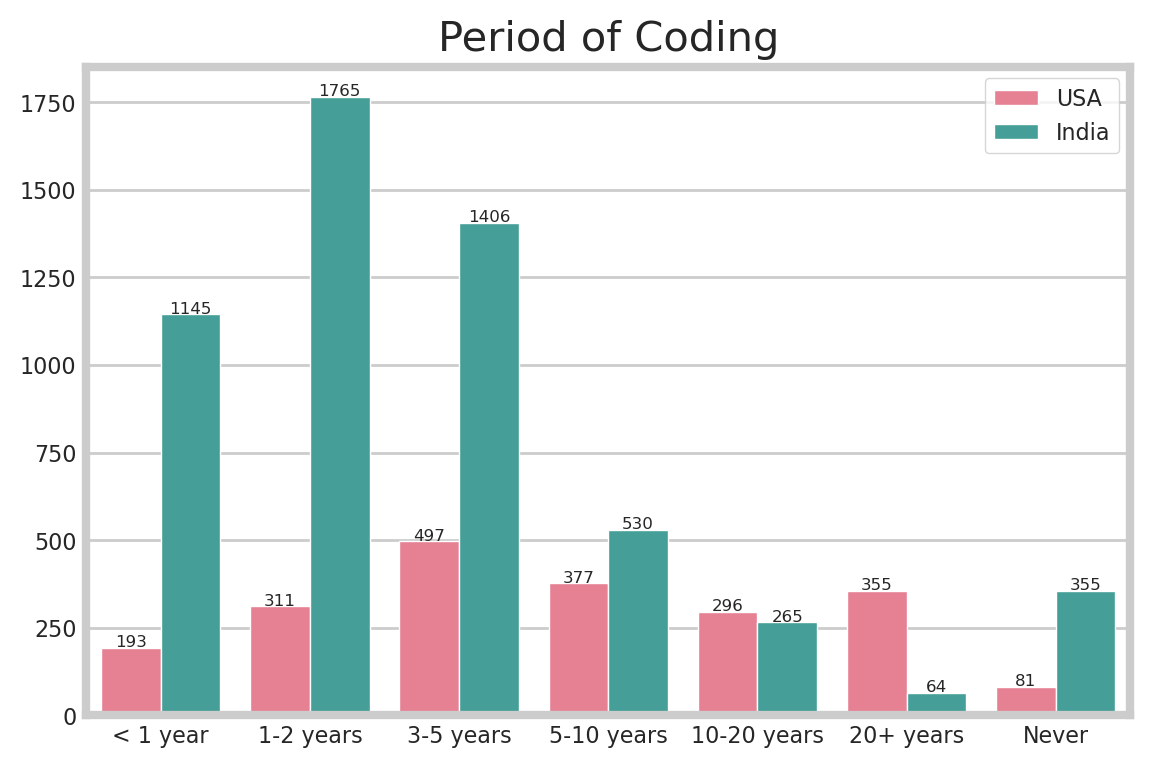

In [17]:
df['Q6'].replace({'I have never written code':'Never',
                  '< 1 years':'< 1 year'}, inplace=True)

def countplot_(data, col_name, q_order):
  values = data[col_name].value_counts()[q_order].values
  ax = sns.countplot(x = col_name, hue=data.columns[3], data=data, hue_order = legend_list, palette = "husl",
                    order = ['< 1 year','1-2 years','3-5 years','5-10 years','10-20 years','20+ years','Never'])
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height+3, height, ha='center', size=6)
  ax.set_ylim([0, 1850])
  plt.xticks(rotation=0, fontsize=8)
  plt.xlabel('')
  plt.yticks(fontsize=8)
  plt.ylabel('')
  plt.legend(fontsize=8, loc='upper right')
  plt.title('Period of Coding', fontsize=15)
  plt.show()
q6_order = ['< 1 year','1-2 years','3-5 years','5-10 years','10-20 years','20+ years','Never']
col_name = "Q6"
countplot_(df, col_name, q6_order)

In [18]:
df_normalize6 = df.groupby(['Q3'])['Q6'].value_counts(dropna=False, normalize=True, ascending=False)
df_normalize6 = pd.DataFrame(df_normalize6)
df_normalize6

Q6
Q3    Q6                   
India 1-2 years    0.305416
      3-5 years    0.243295
      < 1 year     0.198131
      5-10 years   0.091711
      Never        0.061429
      10-20 years  0.045856
      NaN          0.043087
      20+ years    0.011075
USA   3-5 years    0.229986
      5-10 years   0.174456
      20+ years    0.164276
      1-2 years    0.143915
      10-20 years  0.136974
      < 1 year     0.089311
      Never        0.037483
      NaN          0.023600

In the case of the USA respondents, the number of people who have never coded nor programmed is less than that of other groups. It show us that Americans have always been interested in it. More than 30.1% of the respondents are experts who have coded for more than 10 years. Additionally, it is noticeable that the number of beginners is decreasing.

India, on the other hand, has about 6.1% of respondents who have never done coding nor programming. Plus, there are numerous beginners. Almost 74.6% of Indians studied coding for less than 5 years, and about half of the respondents in India coded for less than 3 years.

This graph also shows that there are already lots of coding masters in the USA, and that there are many beginners in India.

### 4-2. Basic programming language (multiple)

In [19]:
# Preprocess Basic programming language data
USA7 = (USA['Q7_Part_1'], USA['Q7_Part_2'], USA['Q7_Part_3'], USA['Q7_Part_4'],
        USA['Q7_Part_5'], USA['Q7_Part_6'], USA['Q7_Part_7'], USA['Q7_Part_8'],
        USA['Q7_OTHER'])
USA7 = pd.concat(USA7)

India7 = (India['Q7_Part_1'], India['Q7_Part_2'], India['Q7_Part_3'], India['Q7_Part_4'],
          India['Q7_Part_5'], India['Q7_Part_6'], India['Q7_Part_7'], India['Q7_Part_8'],
          India['Q7_OTHER'])
India7 = pd.concat(India7)

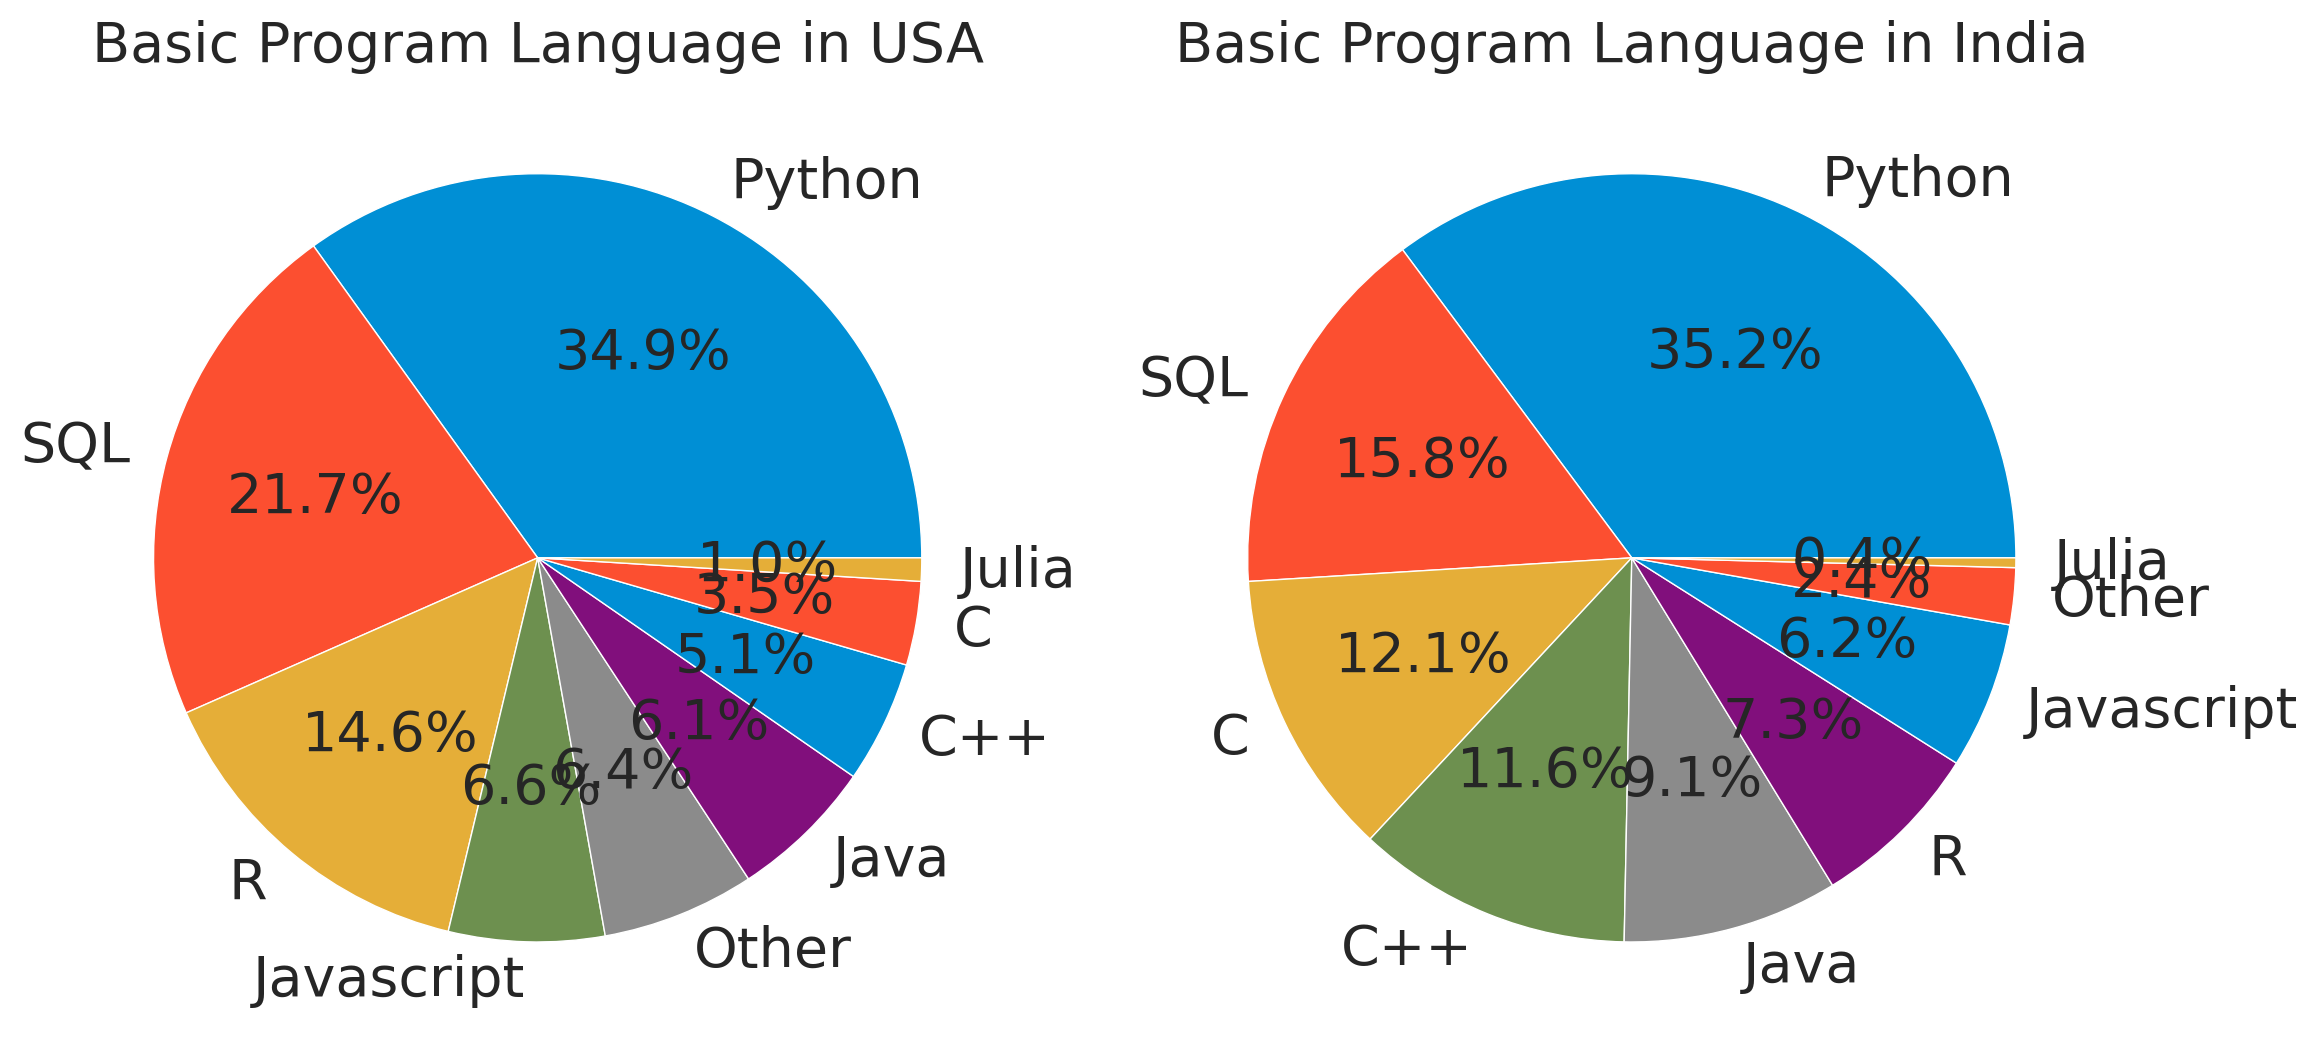

In [20]:
mpl.rcParams['font.size'] = 20

f, ax = plt.subplots(1, 2, figsize = (12, 8))

USA7.replace({'General purpose image/video tools (PIL, cv2, skimage, etc)':'General image/video',
               'Image segmentation methods (U-Net, Mask R-CNN, etc)':'Image segmentation methods',
               'Object detection methods (YOLOv3, RetinaNet, etc)':'Object detection methods',
               'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)':'Image classification & networks',
               'Generative Networks (GAN, VAE, etc)':'Generative Networks'}, inplace=True)
               
India7.replace({'General purpose image/video tools (PIL, cv2, skimage, etc)':'General image/video',
                 'Image segmentation methods (U-Net, Mask R-CNN, etc)':'Image segmentation methods',
                 'Object detection methods (YOLOv3, RetinaNet, etc)':'Object detection methods',
                 'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)':'Image classification & networks',
                 'Generative Networks (GAN, VAE, etc)':'Generative Networks'}, inplace=True)   

USA7.value_counts().plot.pie(autopct='%.1f%%', ax = ax[0])
ax[0].set_title('Basic Program Language in USA', fontsize=20)
ax[0].set_ylabel('')

India7.value_counts().plot.pie(autopct='%.1f%%', ax = ax[1])
ax[1].set_title('Basic Program Language in India', fontsize=20)
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

Both countries use Python the most. The next is SQL. A noticeable difference is shown in the 3rd most used language. In the USA, 14.6% of respondents use R, but in India the 3rd most used programming language is C. In India, R is the third- lowest programming language used whereas in the USA, C is the second-lowest.

Nevertheless, it is clear that the most commonly used languages of both countries are Python and SQL.

### 4-3. Recommend programming language for starter

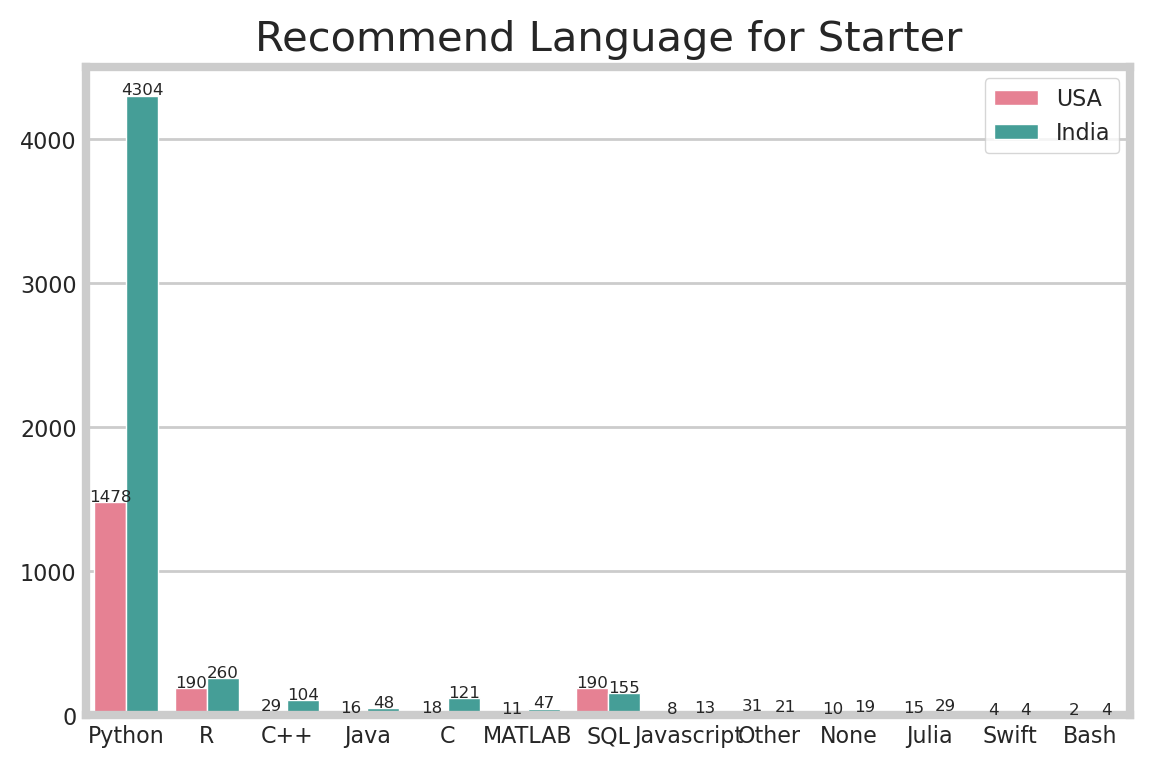

In [21]:
def countplot_(data, col_name, q_order):
  values = data[col_name].value_counts()[q_order].values
  ax = sns.countplot(x = col_name, hue=data.columns[3], data=data, hue_order = legend_list, palette = "husl")
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height+3, height, ha='center', size=6)
  ax.set_ylim([0, 4500])
  plt.xticks(rotation=0, fontsize=8)
  plt.xlabel('')
  plt.yticks(fontsize=8)
  plt.ylabel('')
  plt.legend(fontsize=8, loc='upper right')
  plt.title('Recommend Language for Starter', fontsize=15)
  plt.show()
q8_order = []
col_name = "Q8"
countplot_(df, col_name, q8_order)

The graph shows that Python has an overwhelming proportion. What is unusual is that Indians who use relatively less R recommended R.

### 4-4. Integrated development environments (multiple)

In [22]:
# Preprocess integrated development environments data
USA9 = (USA['Q9_Part_1'], USA['Q9_Part_2'], USA['Q9_Part_3'], USA['Q9_Part_4'],
        USA['Q9_Part_5'], USA['Q9_Part_6'], USA['Q9_Part_7'], USA['Q9_Part_8'],
        USA['Q9_Part_9'], USA['Q9_Part_10'], USA['Q9_Part_11'], USA['Q9_OTHER'])
USA9 = pd.concat(USA9)

India9 = (India['Q9_Part_1'], India['Q9_Part_2'], India['Q9_Part_3'], India['Q9_Part_4'],
        India['Q9_Part_5'], India['Q9_Part_6'], India['Q9_Part_7'], India['Q9_Part_8'],
        India['Q9_Part_9'], India['Q9_Part_10'], India['Q9_Part_11'], India['Q9_OTHER'])
India9 = pd.concat(India9)

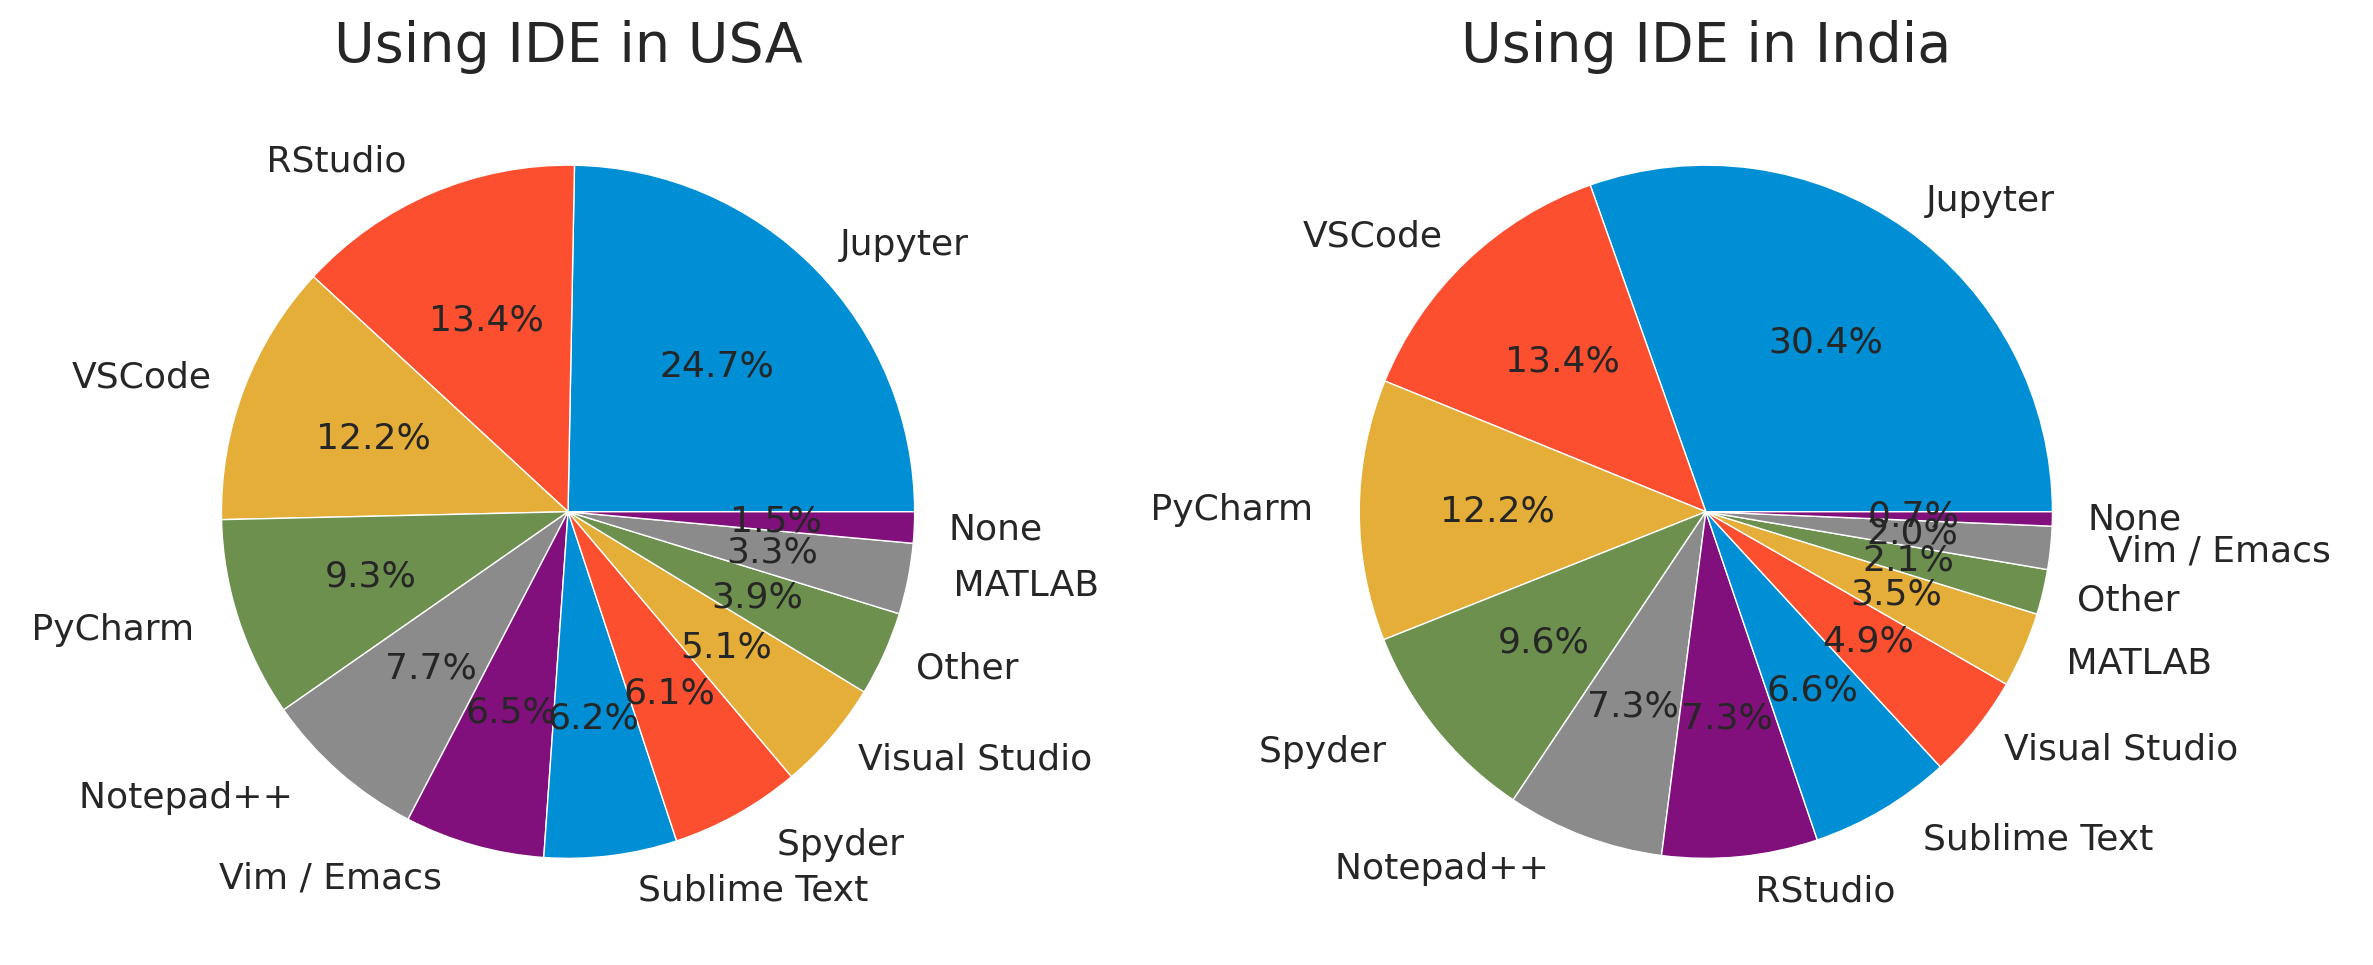

In [23]:
mpl.rcParams['font.size'] = 13

USA9.replace({'Jupyter (JupyterLab, Jupyter Notebooks, etc) ':'Jupyter',
              'Visual Studio Code (VSCode)':'VSCode'}, inplace=True)

India9.replace({'Jupyter (JupyterLab, Jupyter Notebooks, etc) ':'Jupyter',
              'Visual Studio Code (VSCode)':'VSCode'}, inplace=True)

f, ax = plt.subplots(1, 2, figsize = (12, 8))
    
USA9.value_counts().plot.pie(autopct='%.1f%%', ax = ax[0])
ax[0].set_title('Using IDE in USA', fontsize=20)
ax[0].set_ylabel('')

India9.value_counts().plot.pie(autopct='%.1f%%', ax = ax[1])
ax[1].set_title('Using IDE in India', fontsize=20)
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

The development environment used frequently is similar except for RStudio. As we saw in 4-2, the reason why the ratio of RStudio in India is not high is Indian less use R.

* ## 5. Basic of Machine Learning <a class="anchor" id="chapter5"></a>

It's time to check the machine learning section. First, I check to period of using machine learning in each country. And then, let's look at the machine learning framework and algorithms that they use.


### 5-1. Period of Using Machine Learning

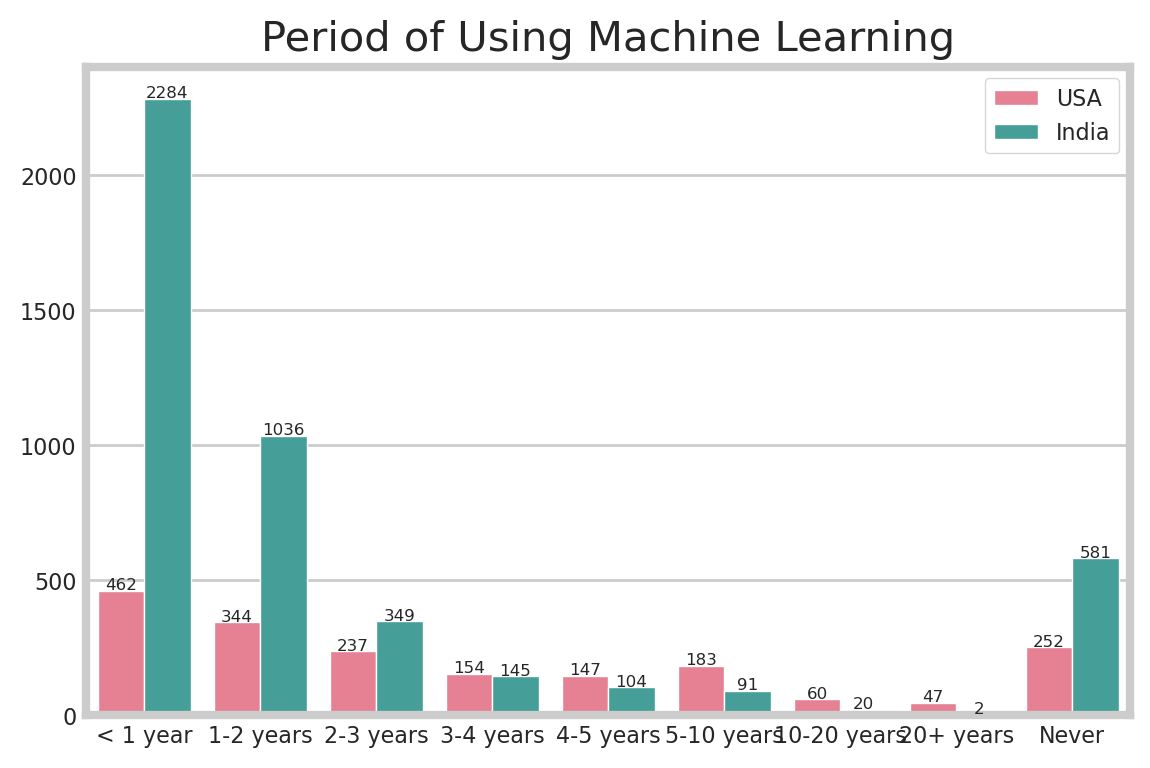

In [24]:
df['Q15'].replace({'Under 1 year':'< 1 year',
                   '20 or more years':'20+ years',
                   'I do not use machine learning methods':'Never'}, inplace=True)

def countplot_(data, col_name, q_order):
  values = data[col_name].value_counts()[q_order].values
  ax = sns.countplot(x = col_name, hue=data.columns[3], data=data, hue_order = legend_list, palette = "husl",
                    order = ['< 1 year','1-2 years','2-3 years','3-4 years','4-5 years','5-10 years','10-20 years','20+ years','Never'])
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height+3, height, ha='center', size=6)
  ax.set_ylim([0, 2400])
  plt.xticks(rotation=0, fontsize=8)
  plt.xlabel('')
  plt.yticks(fontsize=8)
  plt.ylabel('')
  plt.legend(fontsize=8, loc='upper right')
  plt.title('Period of Using Machine Learning', fontsize=15)
  plt.show()
q15_order = ['< 1 year','1-2 years','2-3 years','3-4 years','4-5 years','5-10 years','10-20 years','20+ years','Never']
col_name = "Q15"
countplot_(df, col_name, q15_order)

In [25]:
df_normalize15 = df.groupby(['Q3'])['Q15'].value_counts(dropna=False, normalize=True, ascending=False)
df_normalize15 = pd.DataFrame(df_normalize15)
df_normalize15

Q15
Q3    Q15                  
India < 1 year     0.395224
      NaN          0.201938
      1-2 years    0.179270
      Never        0.100536
      2-3 years    0.060391
      3-4 years    0.025091
      4-5 years    0.017996
      5-10 years   0.015747
      10-20 years  0.003461
      20+ years    0.000346
USA   < 1 year     0.213790
      1-2 years    0.159186
      NaN          0.127256
      Never        0.116613
      2-3 years    0.109671
      5-10 years   0.084683
      3-4 years    0.071263
      4-5 years    0.068024
      10-20 years  0.027765
      20+ years    0.021749

The results of this graph shows the two countries similar. In the USA, many people have been coding for a long time, but there are many beginners in machine learning. Expecially in India, there are about 57.4% of respondents using machine learning. It can be said that **India's coding craze began with the development of machine learning.**

### 5-2. Using machine learning framework (multiple)

In [26]:
# Preprocess machine learning framework data
USA16 = (USA['Q16_Part_1'], USA['Q16_Part_2'], USA['Q16_Part_3'], USA['Q16_Part_4'],
        USA['Q16_Part_5'], USA['Q16_Part_6'], USA['Q16_Part_7'], USA['Q16_Part_8'],
        USA['Q16_Part_9'], USA['Q16_Part_10'], USA['Q16_Part_11'], USA['Q16_Part_12'],
        USA['Q16_Part_13'], USA['Q16_Part_14'], USA['Q16_Part_15'], USA['Q16_OTHER'])
USA16 = pd.concat(USA16)

India16 = (India['Q16_Part_1'], India['Q16_Part_2'], India['Q16_Part_3'], India['Q16_Part_4'],
        India['Q16_Part_5'], India['Q16_Part_6'], India['Q16_Part_7'], India['Q16_Part_8'],
        India['Q16_Part_9'], India['Q16_Part_10'], India['Q16_Part_11'], India['Q16_Part_12'],
        India['Q16_Part_13'], India['Q16_Part_14'], India['Q16_Part_15'], India['Q16_OTHER'])
India16 = pd.concat(India16)

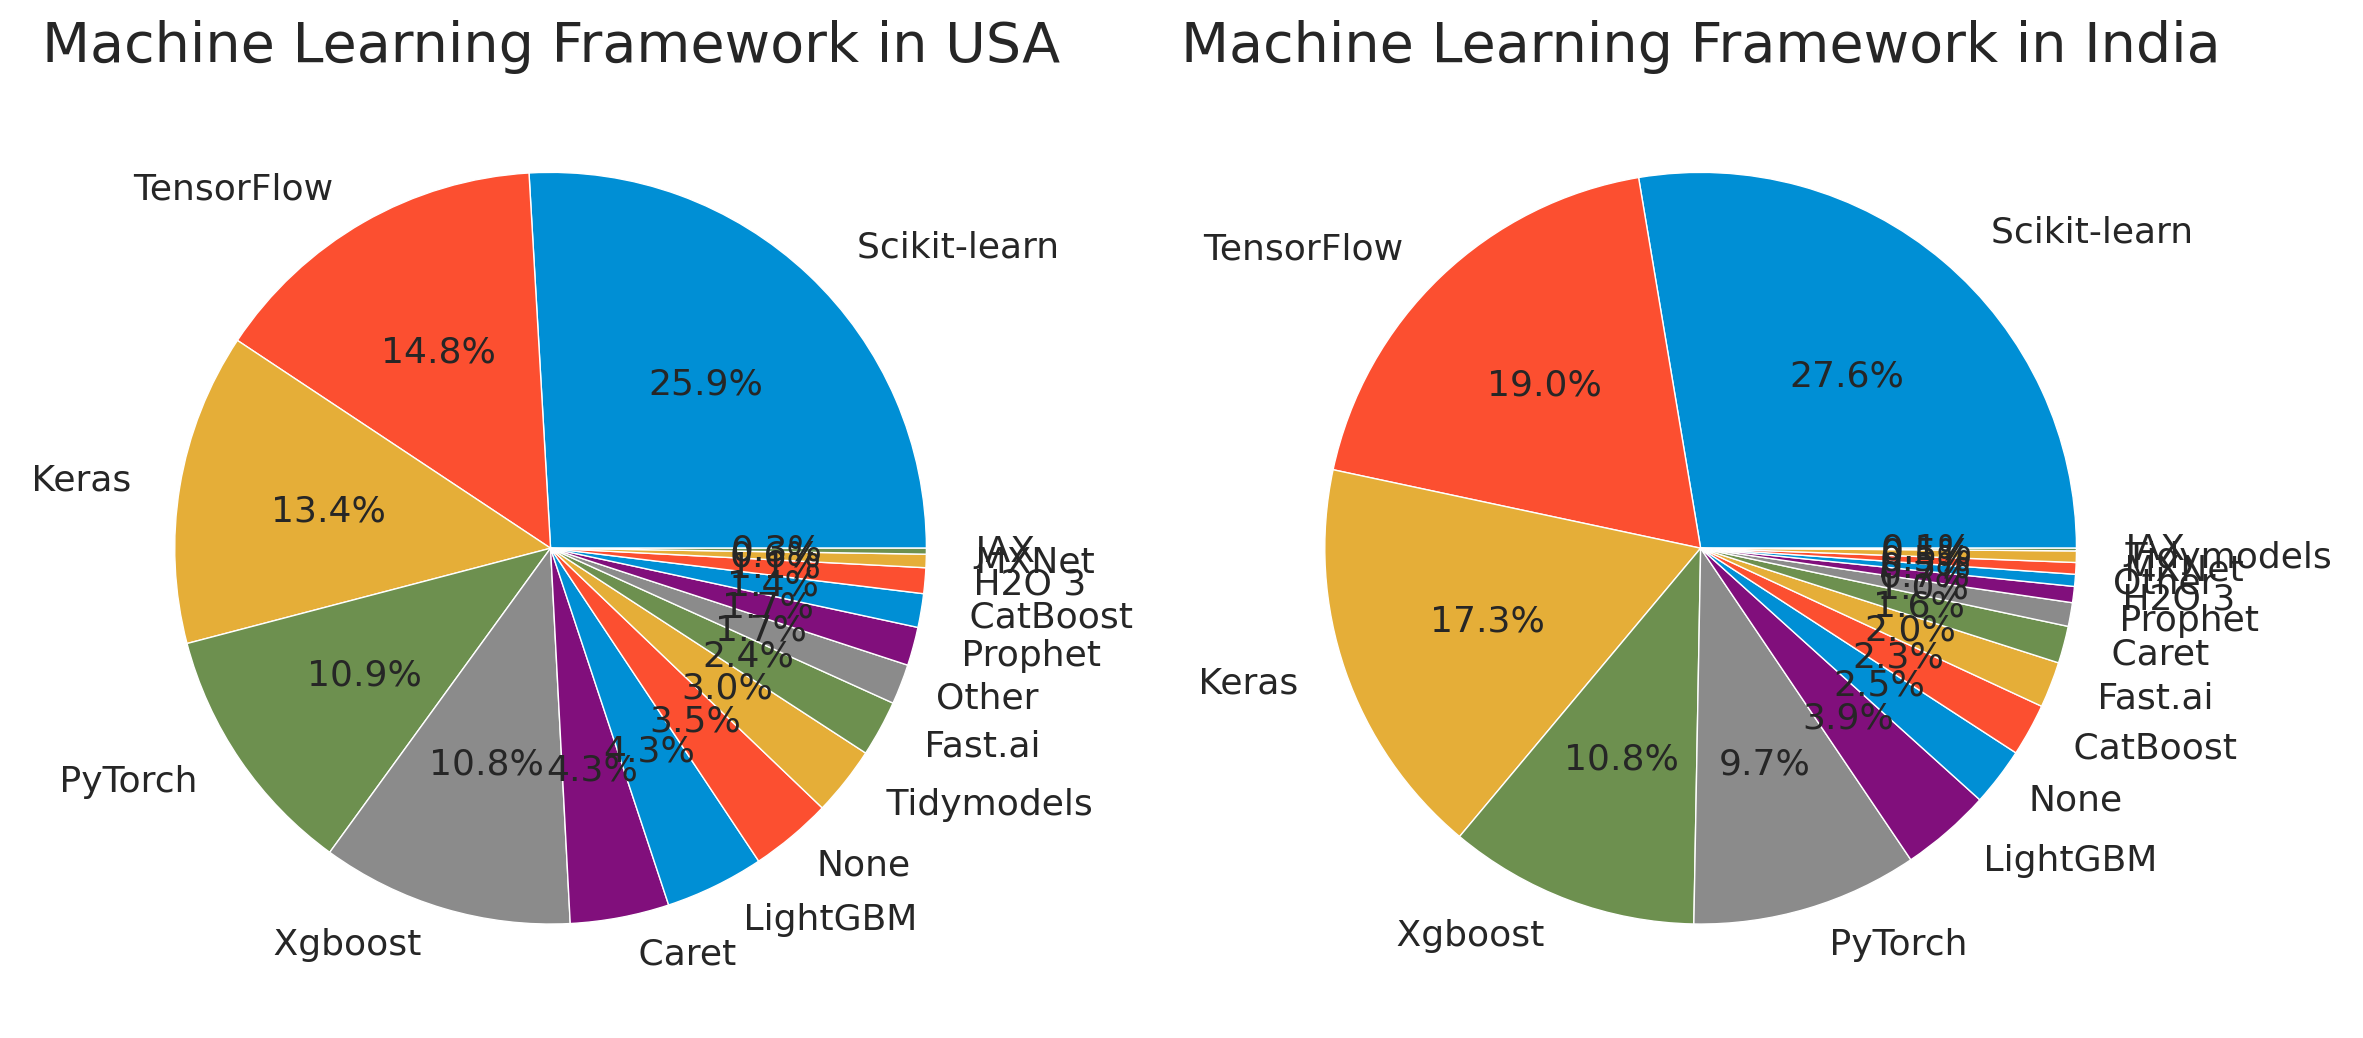

In [27]:
mpl.rcParams['font.size'] = 13

f, ax = plt.subplots(1, 2, figsize = (12, 8))
    
USA16.value_counts().plot.pie(autopct='%.1f%%', ax = ax[0])
ax[0].set_title('Machine Learning Framework in USA', fontsize=20)
ax[0].set_ylabel('')

India16.value_counts().plot.pie(autopct='%.1f%%', ax = ax[1])
ax[1].set_title('Machine Learning Framework in India', fontsize=20)
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

The ranking of machine learning framework of both countries is almost similar. There is a difference between the rank 4th and 5th graphs  which is PyTorch and Xgboost. The most popular framework used is Scikit-learn, with about 25.9% in the USA and about 27.6% in India. TensorFlow and Keras showed about 14.5%, and about 13.4% in the USA and in India about 19.0% and about 17.3% are observed. It shows that more than three quarters of people uses 5 types of framework and one quarter of people uses various framework which occupy less than about 10% each.

### 5-3. Using machine learning algorithm (multiple)

In [28]:
# Preprocess machine learning algorithm data
USA17 = (USA['Q17_Part_1'], USA['Q17_Part_2'], USA['Q17_Part_3'], USA['Q17_Part_4'],
        USA['Q17_Part_5'], USA['Q17_Part_6'], USA['Q17_Part_7'], USA['Q17_Part_8'],
        USA['Q17_Part_9'], USA['Q17_Part_10'], USA['Q17_Part_11'], USA['Q17_OTHER'])
USA17 = pd.concat(USA17)

India17 = (India['Q17_Part_1'], India['Q17_Part_2'], India['Q17_Part_3'], India['Q17_Part_4'],
        India['Q17_Part_5'], India['Q17_Part_6'], India['Q17_Part_7'], India['Q17_Part_8'],
        India['Q17_Part_9'], India['Q17_Part_10'], India['Q17_Part_11'], India['Q17_OTHER'])
India17 = pd.concat(India17)

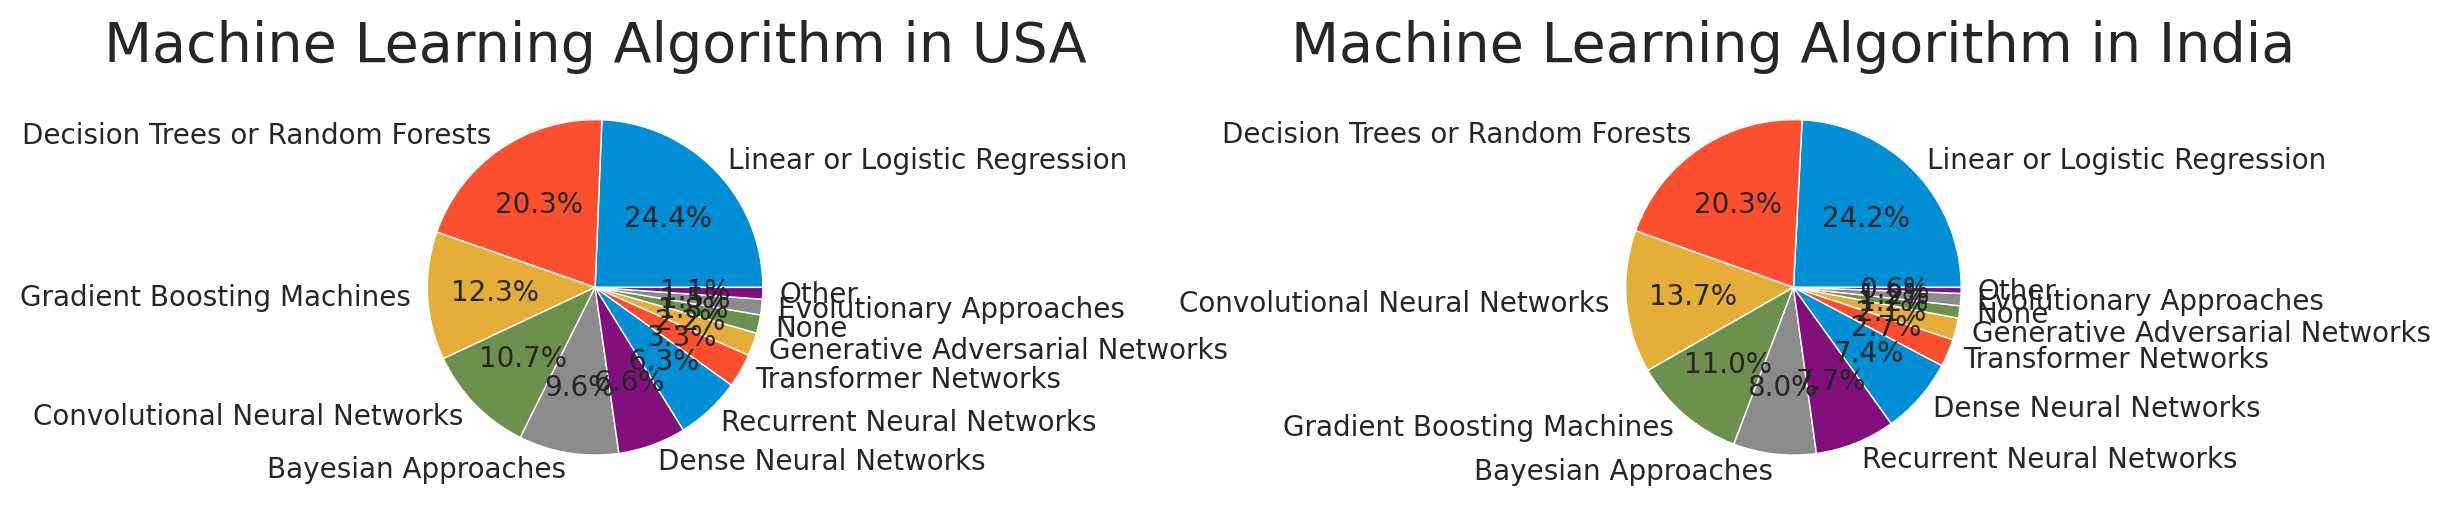

In [29]:
mpl.rcParams['font.size'] = 10

f, ax = plt.subplots(1, 2, figsize = (12, 8))

USA17.replace({'Gradient Boosting Machines (xgboost, lightgbm, etc)':'Gradient Boosting Machines',
               'Dense Neural Networks (MLPs, etc)':'Dense Neural Networks',
               'Transformer Networks (BERT, gpt-3, etc)':'Transformer Networks'}, inplace=True)

India17.replace({'Gradient Boosting Machines (xgboost, lightgbm, etc)':'Gradient Boosting Machines',
                 'Dense Neural Networks (MLPs, etc)':'Dense Neural Networks',
                 'Transformer Networks (BERT, gpt-3, etc)':'Transformer Networks'}, inplace=True)

USA17.value_counts().plot.pie(autopct='%.1f%%', ax = ax[0])
ax[0].set_title('Machine Learning Algorithm in USA', fontsize=20)
ax[0].set_ylabel('')

India17.value_counts().plot.pie(autopct='%.1f%%', ax = ax[1])
ax[1].set_title('Machine Learning Algorithm in India', fontsize=20)
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

The ranking of used machine learning algorithm of both countries is almost similar, too. Linear or logistic regression and decision trees or random forests are most popular in two countries. And there are no significant thing because the result of both countries is alike.

## 6. CV & NLP <a class="anchor" id="chapter6"></a>

Then, I check about Computer Vision and Natural Language Processing because it is importance part of machine learning. Therefore I assumed lots of beginners and exports are interested in this field. In this part, the difference between the USA and India is not visible clearly, so I just show you the ratio graphs.

### 6-1. Computer Vision (multiple)

In [30]:
# Preprocess CV data
USA18 = (USA['Q18_Part_1'], USA['Q18_Part_2'], USA['Q18_Part_3'],
                  USA['Q18_Part_4'], USA['Q18_Part_5'], USA['Q18_Part_6'],
                  USA['Q18_OTHER'])
USA18 = pd.concat(USA18)

India18 = (India['Q18_Part_1'], India['Q18_Part_2'], India['Q18_Part_3'],
                  India['Q18_Part_4'], India['Q18_Part_5'], India['Q18_Part_6'],
                  India['Q18_OTHER'])
India18 = pd.concat(India18)

# Preprocess NLP data
USA19 = (USA['Q19_Part_1'], USA['Q19_Part_2'], USA['Q19_Part_3'],
                  USA['Q19_Part_4'], USA['Q19_Part_5'], USA['Q19_OTHER'])
USA19 = pd.concat(USA19)

India19 = (India['Q19_Part_1'], India['Q19_Part_2'], India['Q19_Part_3'],
                  India['Q19_Part_4'], India['Q19_Part_5'], India['Q19_OTHER'])
India19 = pd.concat(India19)

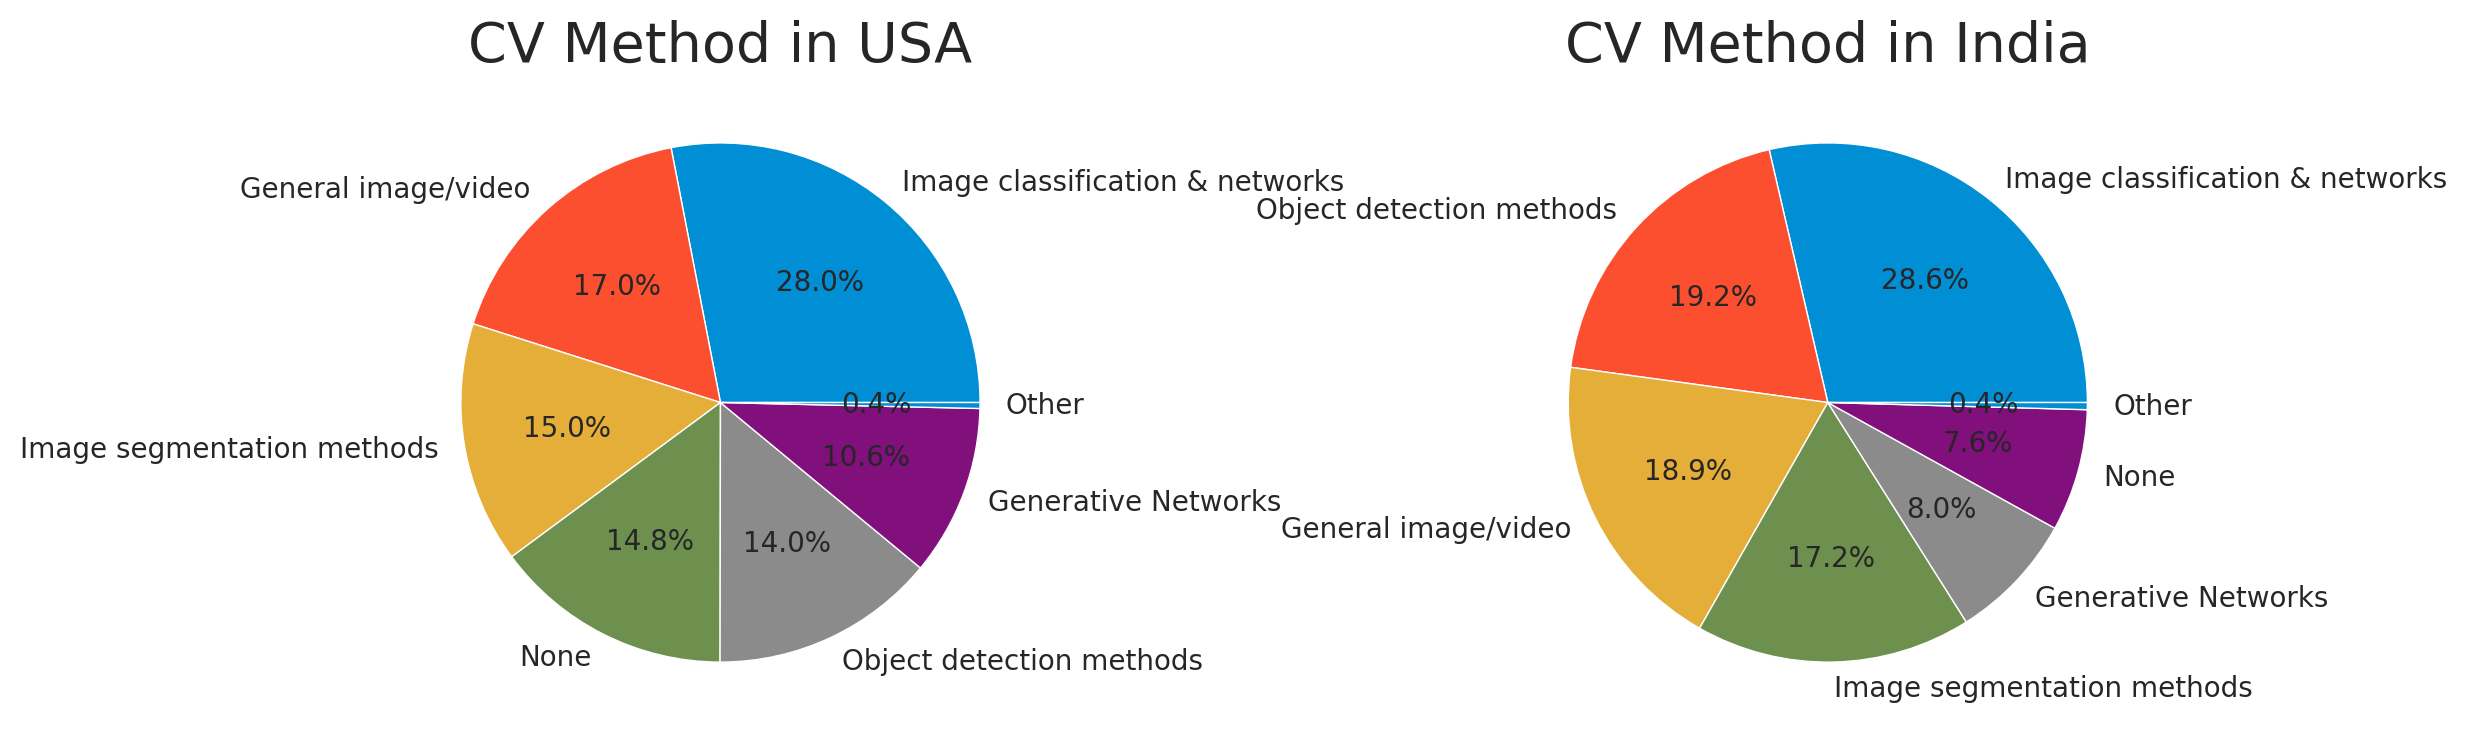

In [31]:
mpl.rcParams['font.size'] = 10

f, ax = plt.subplots(1, 2, figsize = (12, 8))

USA18.replace({'General purpose image/video tools (PIL, cv2, skimage, etc)':'General image/video',
               'Image segmentation methods (U-Net, Mask R-CNN, etc)':'Image segmentation methods',
               'Object detection methods (YOLOv3, RetinaNet, etc)':'Object detection methods',
               'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)':'Image classification & networks',
               'Generative Networks (GAN, VAE, etc)':'Generative Networks'}, inplace=True)
               
India18.replace({'General purpose image/video tools (PIL, cv2, skimage, etc)':'General image/video',
                 'Image segmentation methods (U-Net, Mask R-CNN, etc)':'Image segmentation methods',
                 'Object detection methods (YOLOv3, RetinaNet, etc)':'Object detection methods',
                 'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)':'Image classification & networks',
                 'Generative Networks (GAN, VAE, etc)':'Generative Networks'}, inplace=True)   
    
USA18.value_counts().plot.pie(autopct='%.1f%%', ax = ax[0])
ax[0].set_title('CV Method in USA', fontsize=20)
ax[0].set_ylabel('')

India18.value_counts().plot.pie(autopct='%.1f%%', ax = ax[1])
ax[1].set_title('CV Method in India', fontsize=20)
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

### 6-2. Natural Language Processing (multiple)

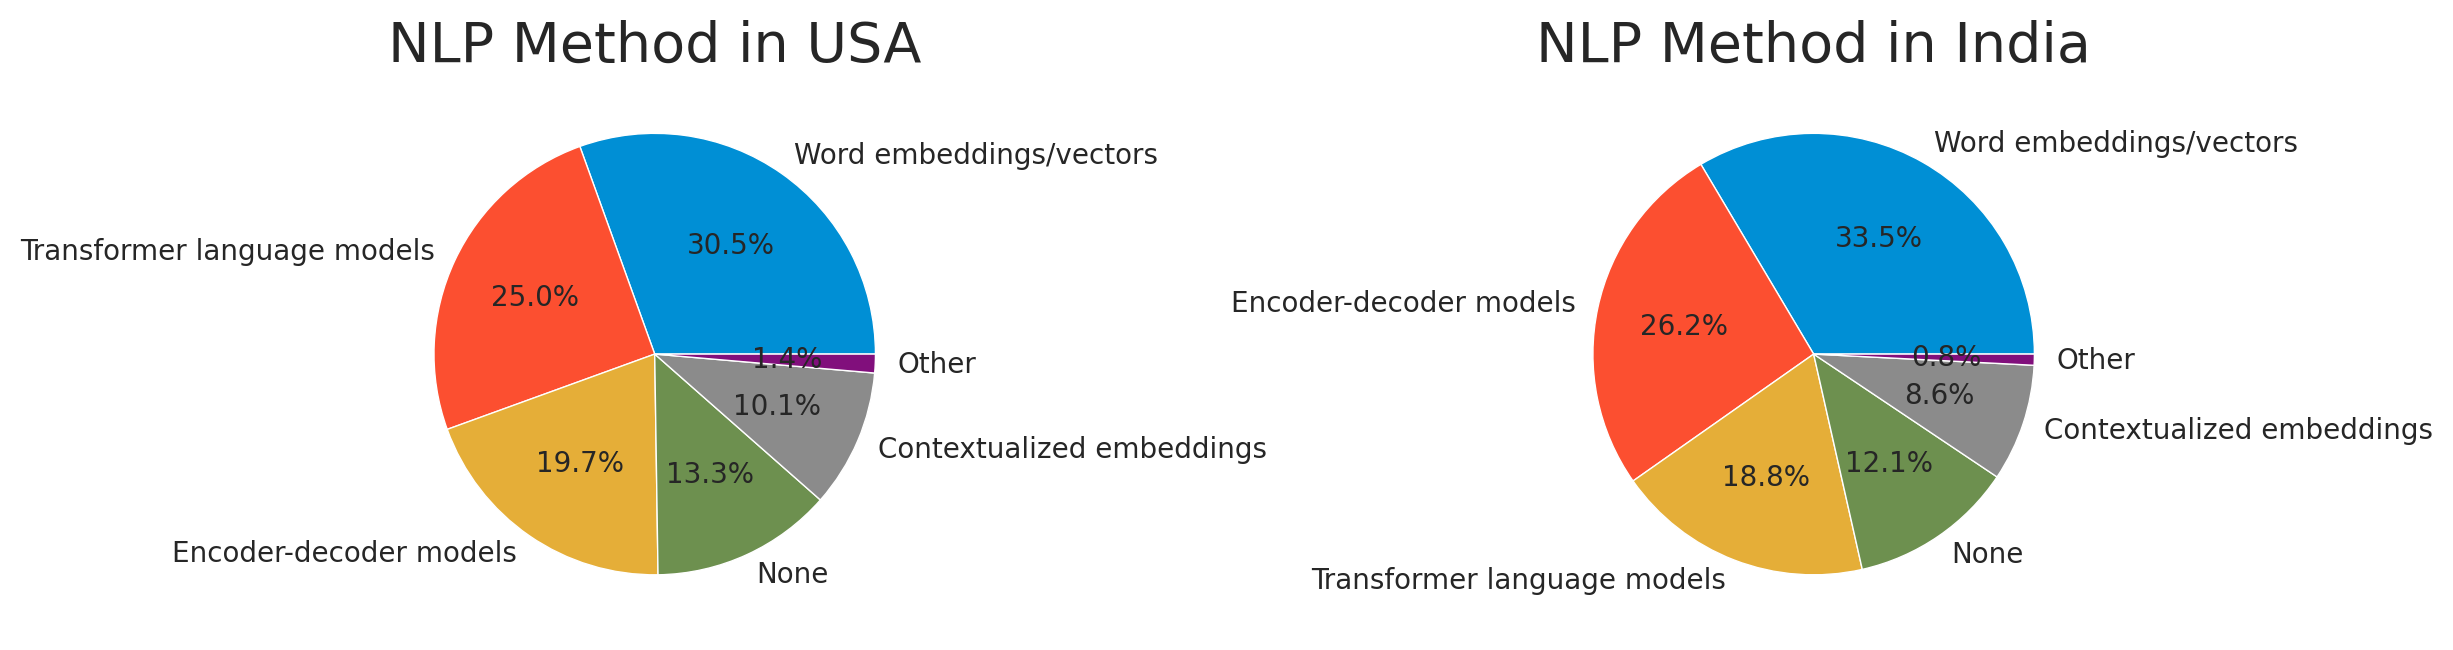

In [32]:
mpl.rcParams['font.size'] = 10

f, ax = plt.subplots(1, 2, figsize = (12, 8))

USA19.replace({'Word embeddings/vectors (GLoVe, fastText, word2vec)':'Word embeddings/vectors',
               'Encoder-decorder models (seq2seq, vanilla transformers)':'Encoder-decoder models',
               'Contextualized embeddings (ELMo, CoVe)':'Contextualized embeddings',
               'Transformer language models (GPT-3, BERT, XLnet, etc)':'Transformer language models'}, inplace=True)

India19.replace({'Word embeddings/vectors (GLoVe, fastText, word2vec)':'Word embeddings/vectors',
                 'Encoder-decorder models (seq2seq, vanilla transformers)':'Encoder-decoder models',
                 'Contextualized embeddings (ELMo, CoVe)':'Contextualized embeddings',
                 'Transformer language models (GPT-3, BERT, XLnet, etc)':'Transformer language models'}, inplace=True)

USA19.value_counts().plot.pie(autopct='%.1f%%', ax = ax[0])
ax[0].set_title('NLP Method in USA', fontsize=20)
ax[0].set_ylabel('')

India19.value_counts().plot.pie(autopct='%.1f%%', ax = ax[1])
ax[1].set_title('NLP Method in India', fontsize=20)
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

## 7. Machine Learning in the business <a class="anchor" id="chapter7"></a>

I wondered if the company actually uses machine learning in their business, so I choose this question. Unfortunately, there are few answers that could be used because there are many missing values.

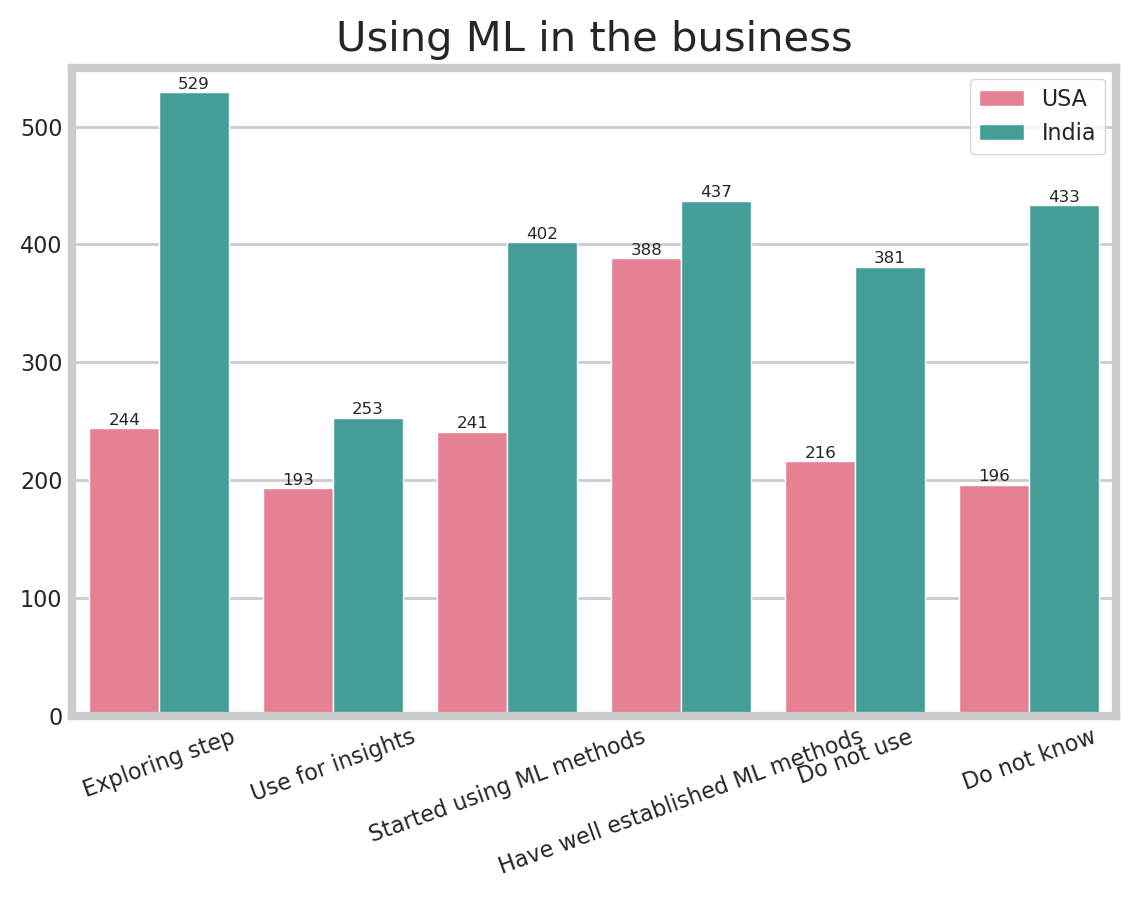

In [33]:
df = df.dropna(subset=['Q22']) # drop NaN

df['Q22'].replace({'We are exploring ML methods (and may one day put a model into production)':'Exploring step',
                   'We use ML methods for generating insights (but do not put working models into production)':'Use for insights',
                   'We recently started using ML methods (i.e., models in production for less than 2 years)':'Started using ML methods',
                   'We have well established ML methods (i.e., models in production for more than 2 years)':'Have well established ML methods',
                   'No (we do not use ML methods)':'Do not use',
                   'I do not know':'Do not know'}, inplace=True)

def countplot_(data, col_name, q_order):
  values = data[col_name].value_counts()[q_order].values
  ax = sns.countplot(x = col_name, hue=data.columns[3], data=data, hue_order = legend_list, palette = "husl",
                    order = ['Exploring step','Use for insights','Started using ML methods','Have well established ML methods','Do not use','Do not know'])
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height+3, height, ha='center', size=6)
  ax.set_ylim([0, 550])
  plt.xticks(rotation=20, fontsize=8)
  plt.xlabel('')
  plt.yticks(fontsize=8)
  plt.ylabel('')
  plt.legend(fontsize=8, loc='upper right')
  plt.title('Using ML in the business', fontsize=15)
  plt.show()
q22_order = ['Exploring step','Use for insights','Started using ML methods','Have well established ML methods','Do not use','Do not know']
col_name = "Q22"
countplot_(df, col_name, q22_order)

In [34]:
df_normalize22 = df.groupby(['Q3'])['Q22'].value_counts(dropna=False, normalize=True, ascending=False)
df_normalize22 = pd.DataFrame(df_normalize22)
df_normalize22

Q22
Q3    Q22                                       
India Exploring step                    0.217248
      Have well established ML methods  0.179466
      Do not know                       0.177823
      Started using ML methods          0.165092
      Do not use                        0.156468
      Use for insights                  0.103901
USA   Have well established ML methods  0.262517
      Exploring step                    0.165088
      Started using ML methods          0.163058
      Do not use                        0.146143
      Do not know                       0.132612
      Use for insights                  0.130582

There are so many NaN. I think they didn't know about it, so they just skipped that question. I dropped all NaN in this question.

In the USA, there are about 72.3% of respondents's firm use machine learning for their business. In India there are about 66.4% of respondents's firm use it for their business. It is noticeable that the ratio of using machine learning in the business in both counrty is not big different.

However, it may be an uncertain value because all missing values are deleted. Therefore if you wondered about it, I strongly recommend find some useful reports.

## 8. Want to learn machine learning product (multiple) <a class="anchor" id="chapter8"></a>

Finally, I comfirm that the machine learning products what Americans and Indians want to learn. Because the importance and potential of machine learning is continuosly emphasized, I feel like it help us to understand the trend of indusrty.

In [35]:
# Preprocess data
USA28b = (USA['Q28_B_Part_1'], USA['Q28_B_Part_2'], USA['Q28_B_Part_3'],
          USA['Q28_B_Part_4'], USA['Q28_B_Part_5'], USA['Q28_B_Part_6'],
          USA['Q28_B_Part_7'], USA['Q28_B_Part_8'], USA['Q28_B_Part_9'], USA['Q28_B_OTHER'])
USA28b = pd.concat(USA28b)

India28b = (India['Q28_B_Part_1'], India['Q28_B_Part_2'], India['Q28_B_Part_3'],
            India['Q28_B_Part_4'], India['Q28_B_Part_5'], India['Q28_B_Part_6'],
            India['Q28_B_Part_7'], India['Q28_B_Part_8'], India['Q28_B_Part_9'], India['Q28_B_OTHER'])
India28b = pd.concat(India28b)

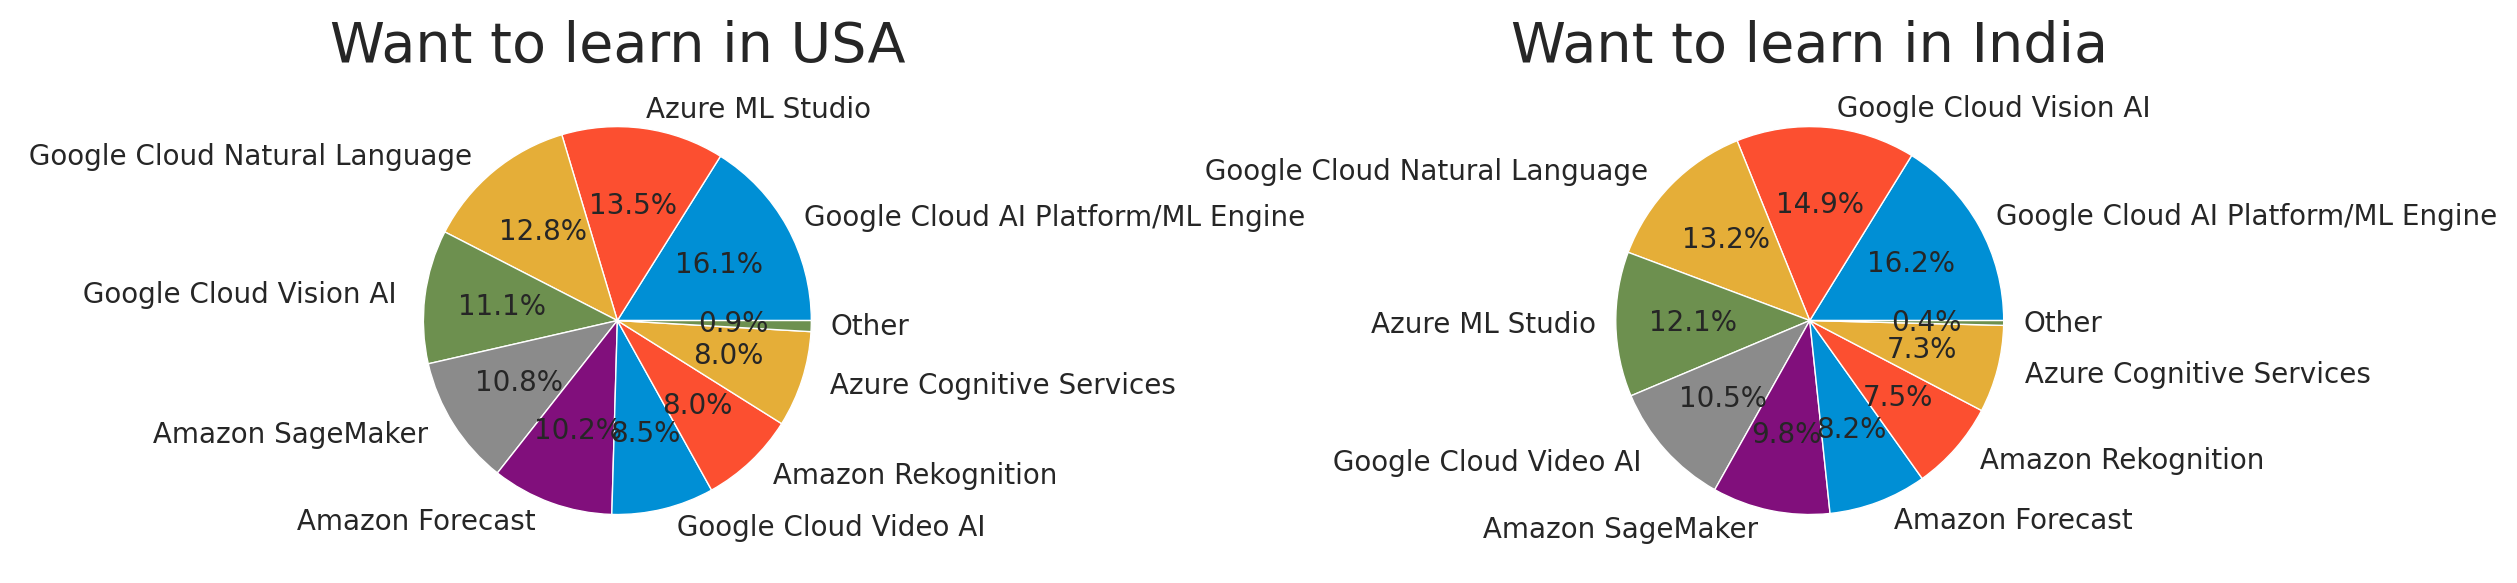

In [36]:
mpl.rcParams['font.size'] = 10

f, ax = plt.subplots(1, 2, figsize = (12, 8))

USA28b.replace({' Azure Machine Learning Studio ':'Azure ML Studio',
                ' Google Cloud AI Platform / Google Cloud ML Engine':'Google Cloud AI Platform/ML Engine'}, inplace=True)    
India28b.replace({' Azure Machine Learning Studio ':'Azure ML Studio',
                ' Google Cloud AI Platform / Google Cloud ML Engine':'Google Cloud AI Platform/ML Engine'}, inplace=True)                
    
USA28b.value_counts().plot.pie(autopct='%.1f%%', ax = ax[0])
ax[0].set_title('Want to learn in USA', fontsize=20)
ax[0].set_ylabel('')

India28b.value_counts().plot.pie(autopct='%.1f%%', ax = ax[1])
ax[1].set_title('Want to learn in India', fontsize=20)
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

Everything was chosen by similarly ratio. Above all, Google Cloud AI Platform / Google Cloud ML Engine is the most popular among beginners in two countries.

### **Conclusion**

Through exploratory data analysis of 《2020 Kaggle Machine Learning & df Science Survey》, we were able to learn about trends of coding and machine learning. Comparing with an obvious IT powerhouse country, the USA and the rising IT powerhouse India is very meaningful to explore trends of it. Most noticeable is that the USA has been interested in coding and programs from long ago, and India is a country with coding craze especially among young ages. It is amazing that the two countries' response are very similar in the part of machine learning surveys. I think it is proven the importance of machine learning these days. It was an interesting work.